All imports successful!
AUTOENCODERS FOR RATING PREDICTION IN RECOMMENDER SYSTEMS

1. Generating rating data with missing values...
Generated data:
  Users: 300
  Items: 100
  Observed ratings: 9034
  Missing ratings: 20966
  Sparsity: 69.89%
  Rating range: 1.00 - 5.00

2. Preparing datasets...
Dataset split:
  Train users: 180
  Val users: 60
  Test users: 60
Using device: cpu

3. VANILLA AUTOENCODER
Starting VANILLA training for 50 epochs...
--------------------------------------------------------------------------------
Epoch  10/50 | Train Loss: 924.2434 | Val Loss: 762.1184 | LR: 0.001000
Epoch  20/50 | Train Loss: 635.8448 | Val Loss: 607.4417 | LR: 0.001000
Epoch  30/50 | Train Loss: 479.8213 | Val Loss: 521.0808 | LR: 0.001000
Epoch  40/50 | Train Loss: 394.8866 | Val Loss: 467.3035 | LR: 0.001000
Epoch  50/50 | Train Loss: 340.1183 | Val Loss: 431.4880 | LR: 0.001000

Training completed! Best validation loss: 431.4880


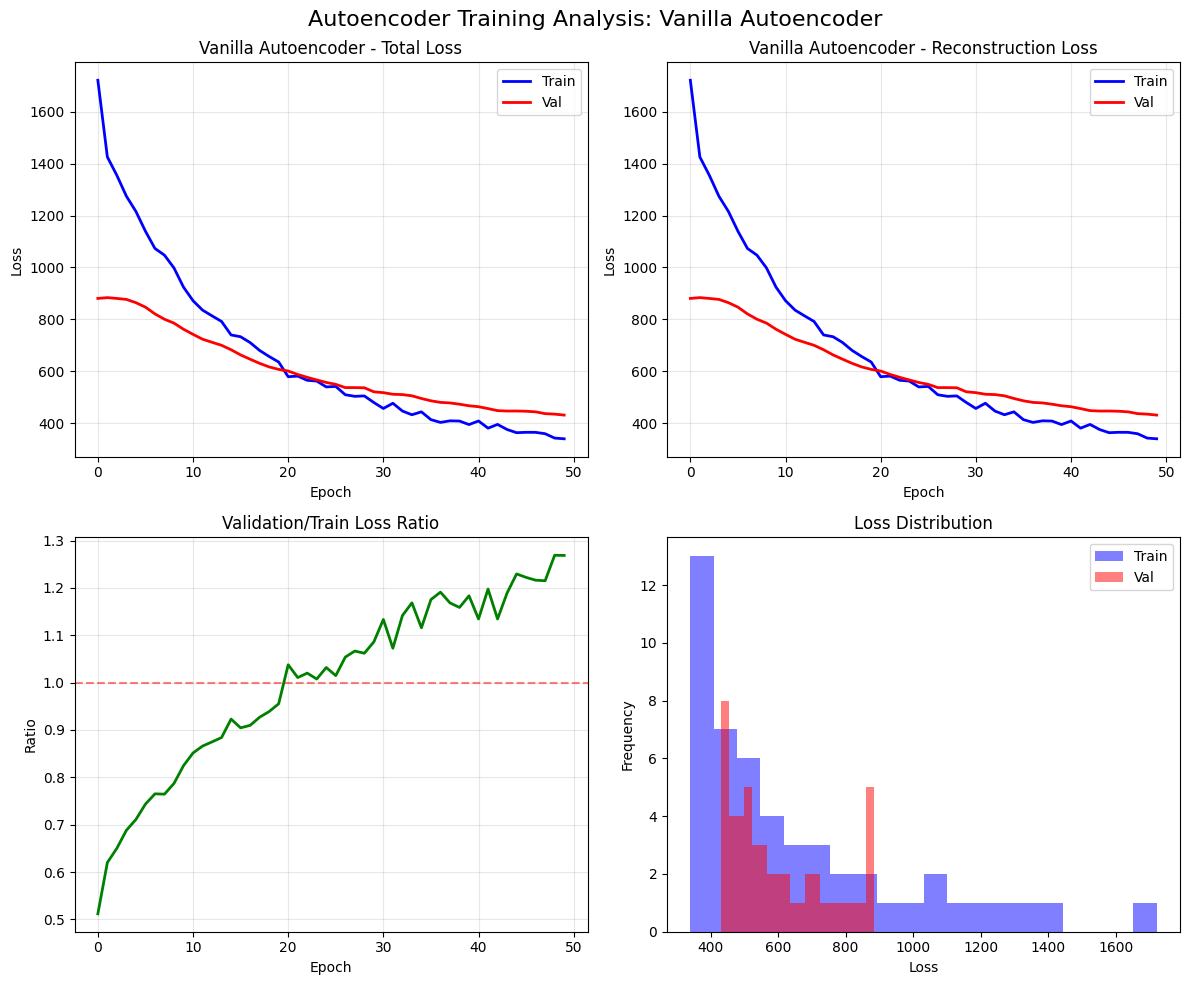


4. DENOISING AUTOENCODER
Starting DENOISING training for 50 epochs...
--------------------------------------------------------------------------------
Epoch  10/50 | Train Loss: 1225.4035 | Val Loss: 835.8680 | LR: 0.001000
Epoch  20/50 | Train Loss: 912.1096 | Val Loss: 705.1870 | LR: 0.001000
Epoch  30/50 | Train Loss: 747.2041 | Val Loss: 591.5692 | LR: 0.001000
Epoch  40/50 | Train Loss: 607.9554 | Val Loss: 518.3024 | LR: 0.001000
Epoch  50/50 | Train Loss: 522.6981 | Val Loss: 470.3080 | LR: 0.001000

Training completed! Best validation loss: 470.3080


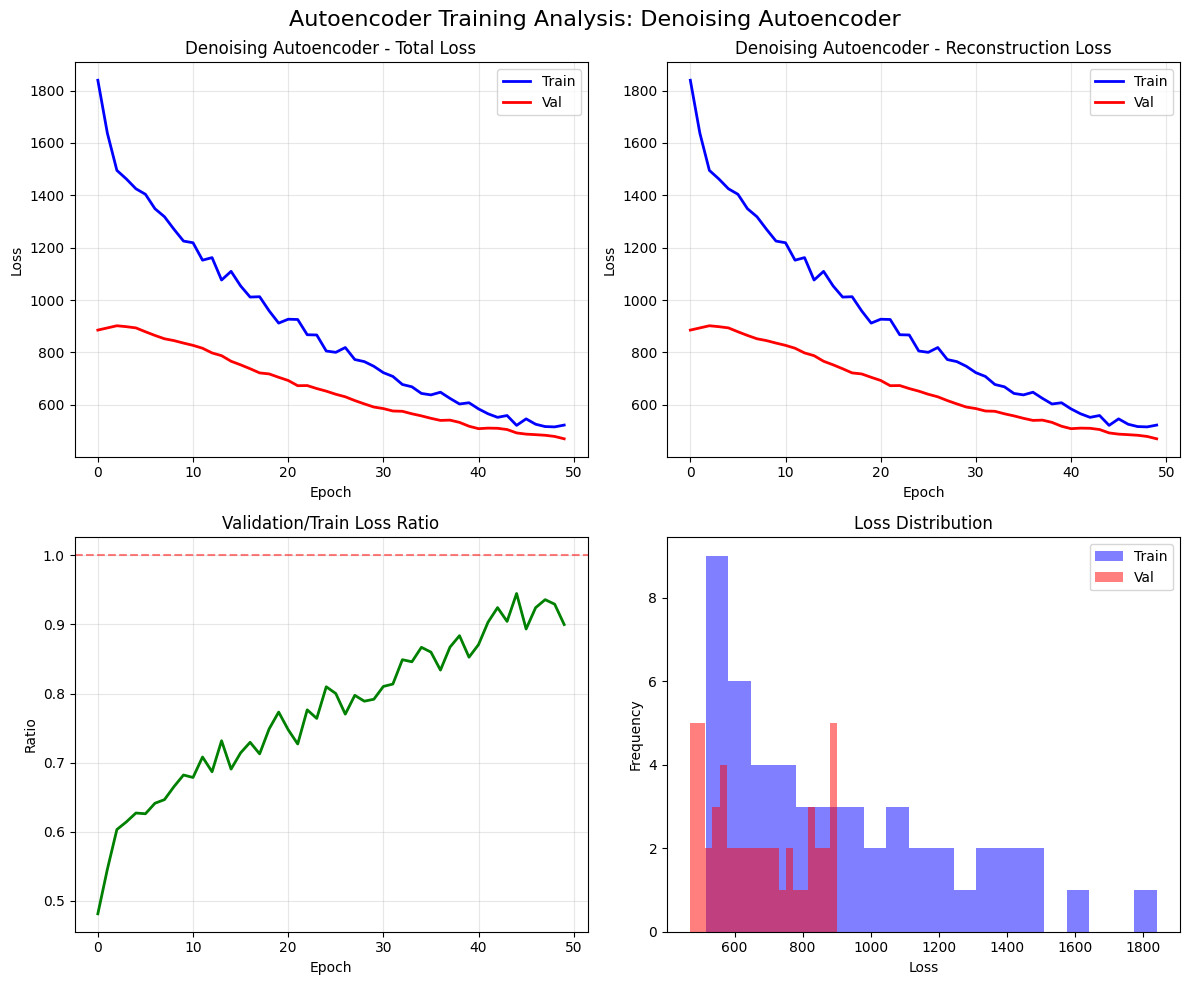


5. VARIATIONAL AUTOENCODER
Starting VAE training for 50 epochs...
--------------------------------------------------------------------------------

Early stopping triggered at epoch 8

Training completed! Best validation loss: 970.0572


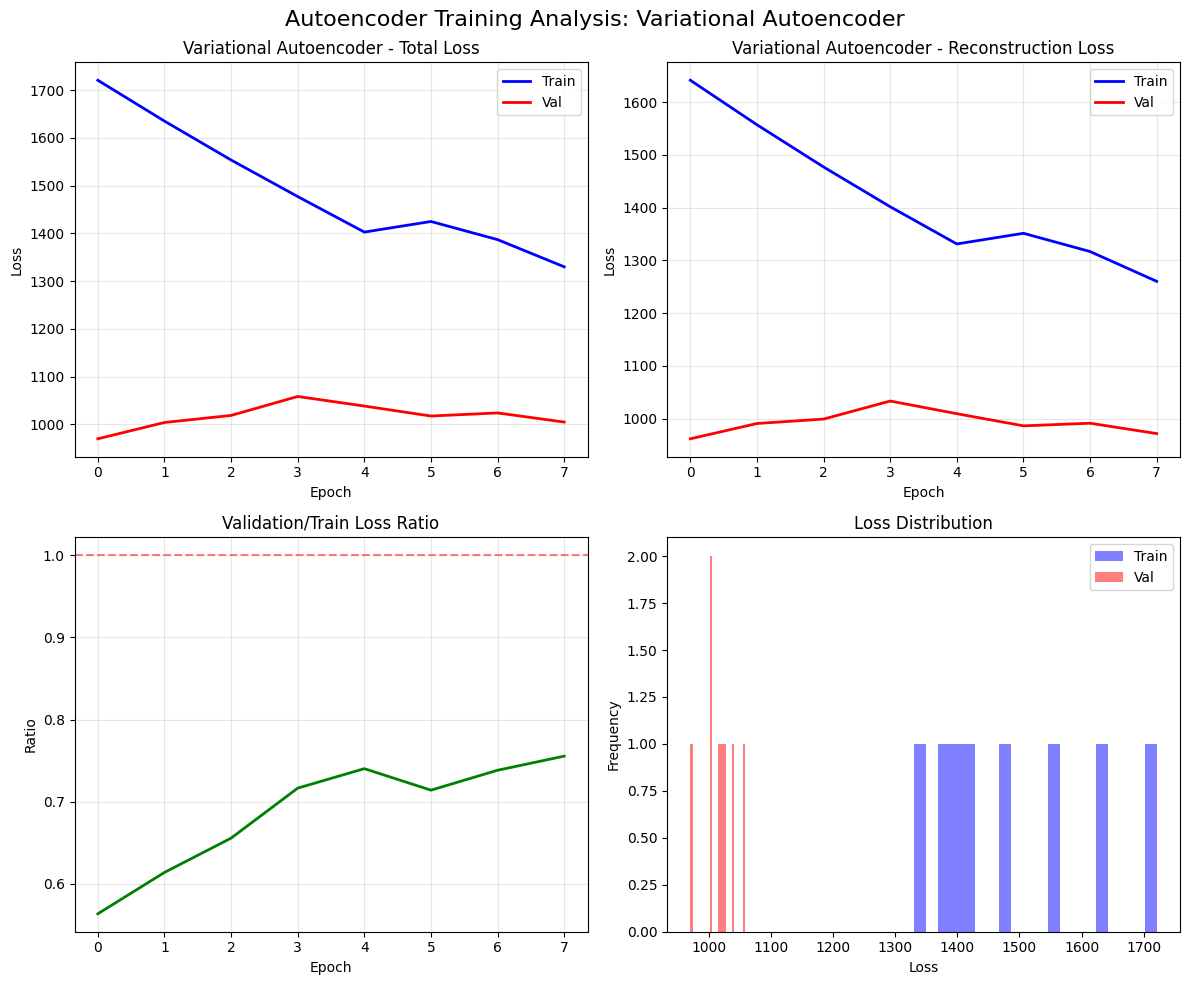


6. CREATING RECOMMENDER SYSTEMS
Precomputing user embeddings...
Computed embeddings for 60 users
Embedding dimension: 64
Precomputing user embeddings...
Computed embeddings for 60 users
Embedding dimension: 64
Precomputing user embeddings...
Computed embeddings for 60 users
Embedding dimension: 32

7. TESTING ON SPECIFIC USER

Testing recommendations for User 0

Vanilla Autoencoder recommendations:
  1. Item 19: Predicted 4.24, True 4.86
  2. Item 46: Predicted 4.18, True 5.00
  3. Item 38: Predicted 4.14, True 5.00
  4. Item 44: Predicted 4.03, True 5.00
  5. Item 75: Predicted 4.01, True 4.40

Denoising Autoencoder recommendations:
  1. Item 46: Predicted 4.61, True 5.00
  2. Item 98: Predicted 4.08, True 5.00
  3. Item 44: Predicted 3.84, True 5.00
  4. Item 50: Predicted 3.83, True 4.95
  5. Item 77: Predicted 3.75, True 2.73

Variational Autoencoder recommendations:
  1. Item 25: Predicted 4.26, True 5.00
  2. Item 32: Predicted 3.89, True 3.47
  3. Item 29: Predicted 3.77, True 

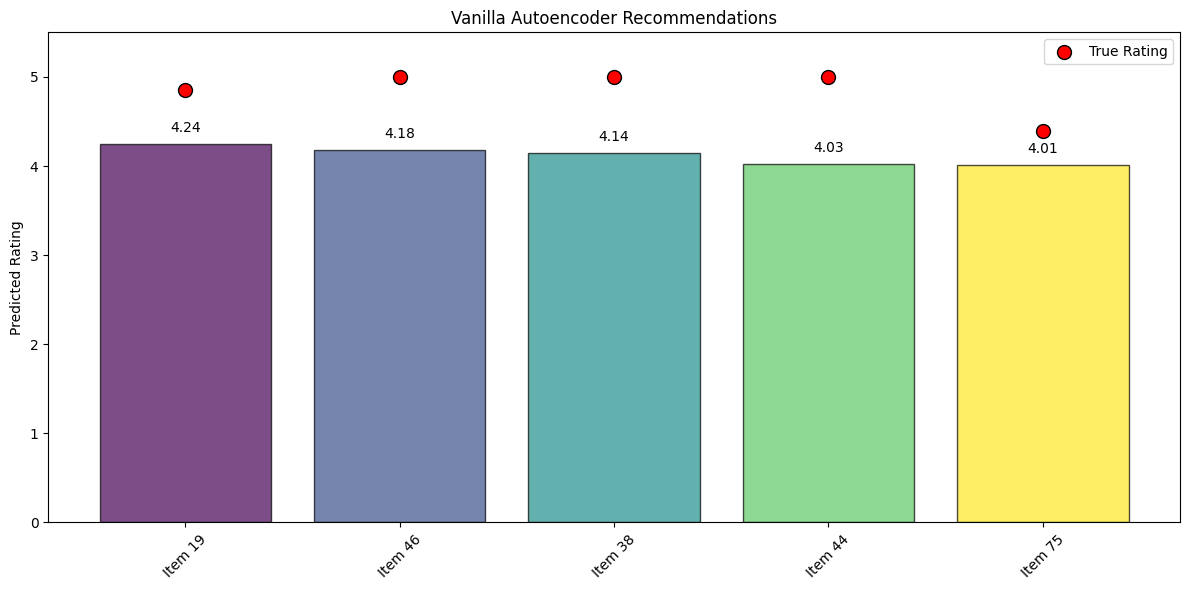

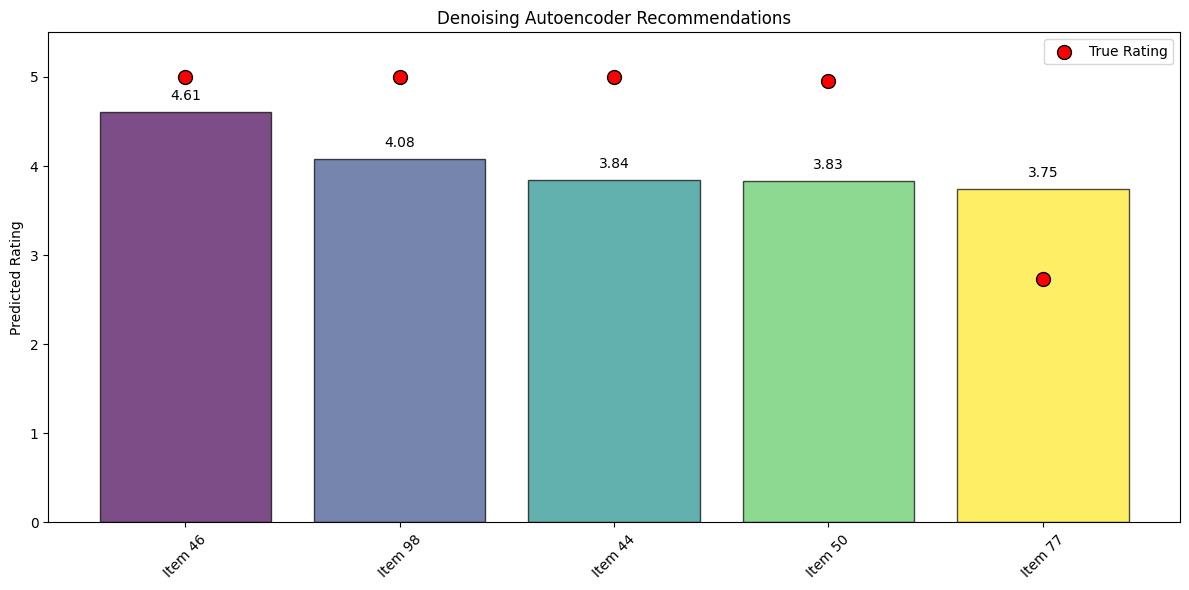

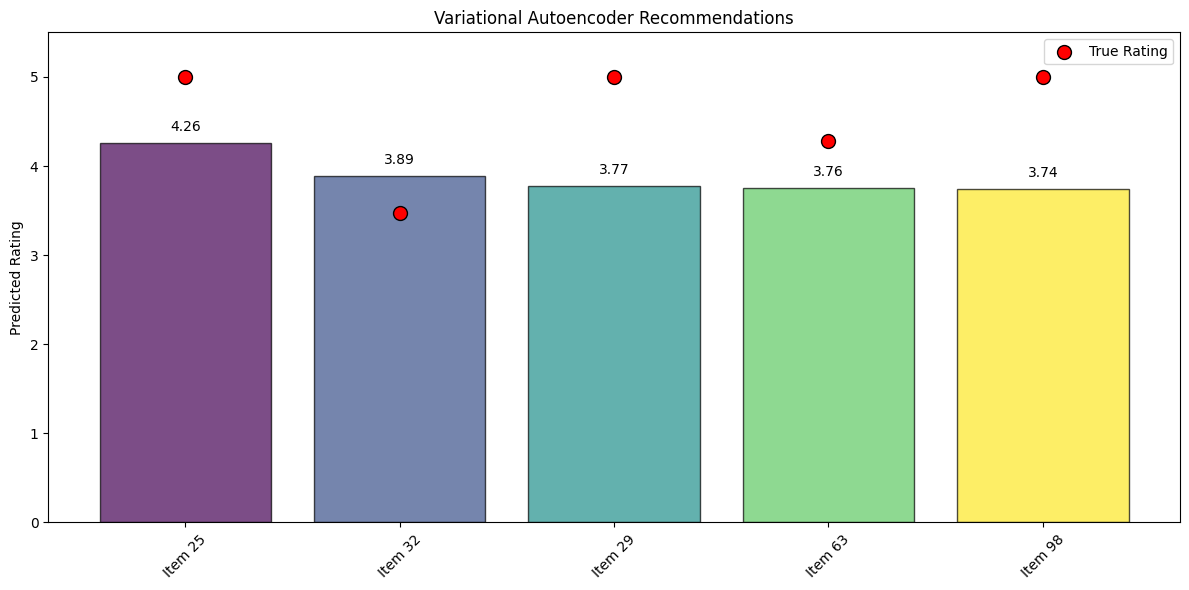


8. LATENT SPACE VISUALIZATION

Visualizing Vanilla Autoencoder latent space...


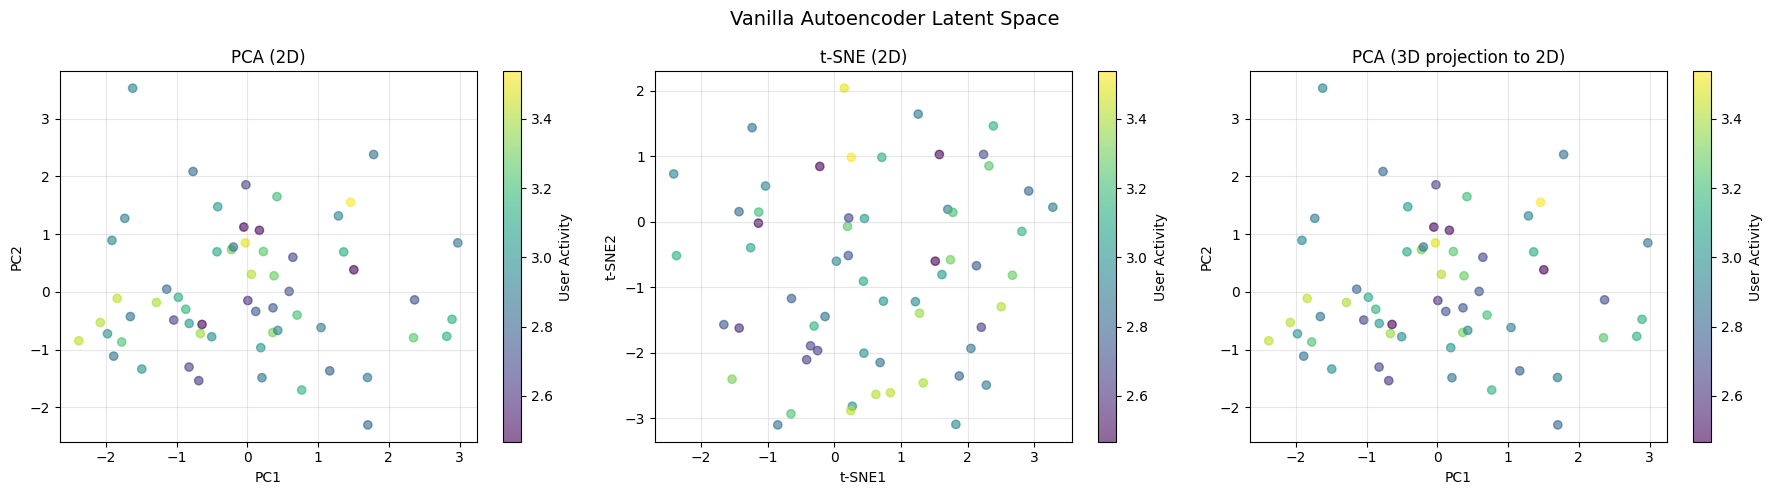

PCA Explained Variance (2 components): 0.265
PCA Explained Variance (3 components): 0.364

Visualizing Denoising Autoencoder latent space...


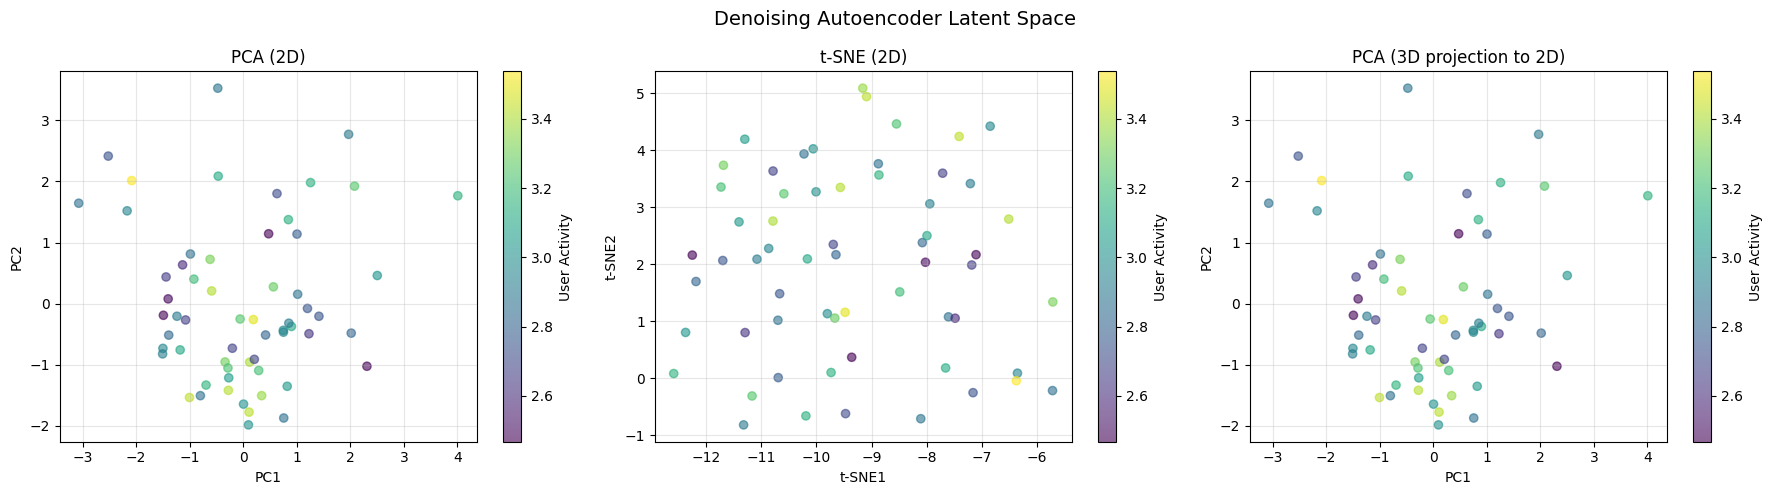

PCA Explained Variance (2 components): 0.349
PCA Explained Variance (3 components): 0.451

Visualizing VAE latent space...


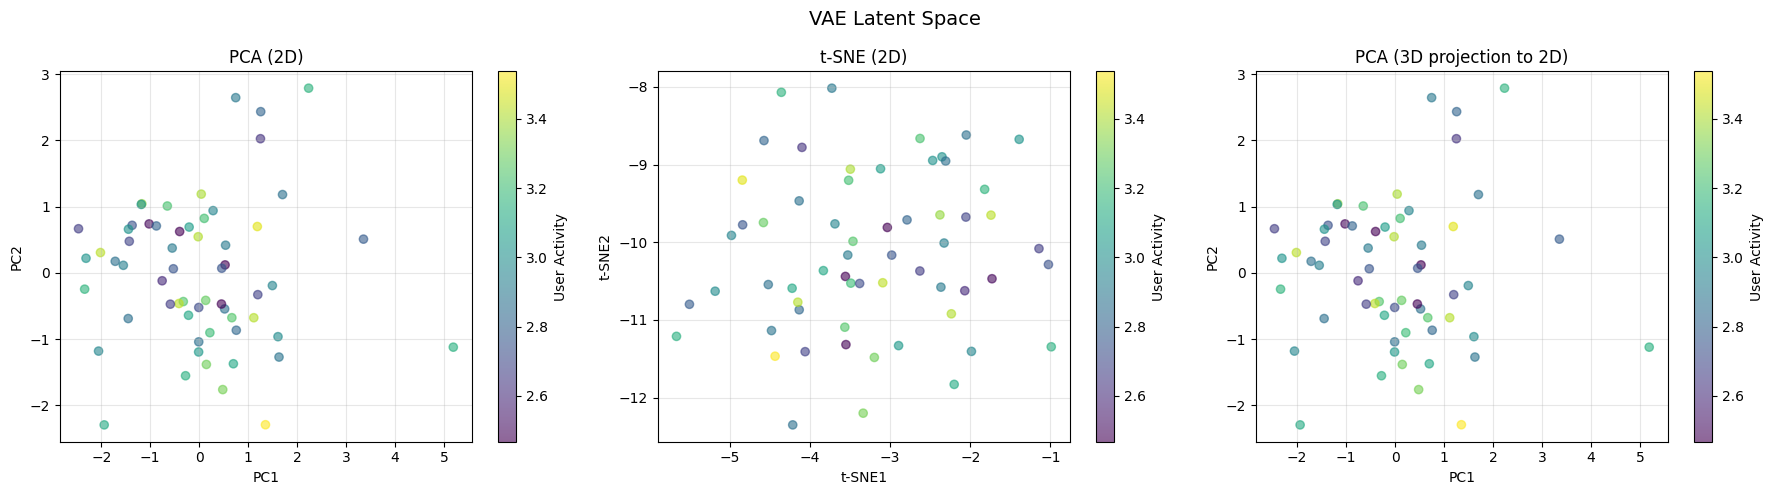

PCA Explained Variance (2 components): 0.255
PCA Explained Variance (3 components): 0.339

9. FINDING SIMILAR USERS

Users similar to User 5:

Vanilla Autoencoder similar users:
  User 7: similarity 0.679
  User 33: similarity 0.664
  User 10: similarity 0.636

Denoising Autoencoder similar users:
  User 33: similarity 0.716
  User 7: similarity 0.674
  User 20: similarity 0.602

VAE similar users:
  User 27: similarity 0.693
  User 55: similarity 0.596
  User 34: similarity 0.561

10. COLD START RECOMMENDATIONS

Cold start recommendations for new user with ratings: {10: 4.5, 25: 1.5, 50: 3.0}

Denoising Autoencoder cold start recommendations:
  1. Item 60: Predicted rating 4.37
  2. Item 5: Predicted rating 4.23
  3. Item 41: Predicted rating 4.03
  4. Item 90: Predicted rating 3.98
  5. Item 3: Predicted rating 3.89

11. MODEL EVALUATION

Evaluating prediction accuracy on test set...

Vanilla Autoencoder:
  MAE:  0.8375
  RMSE: 1.0292
  Predictions evaluated: 1472

Denoising Autoenco

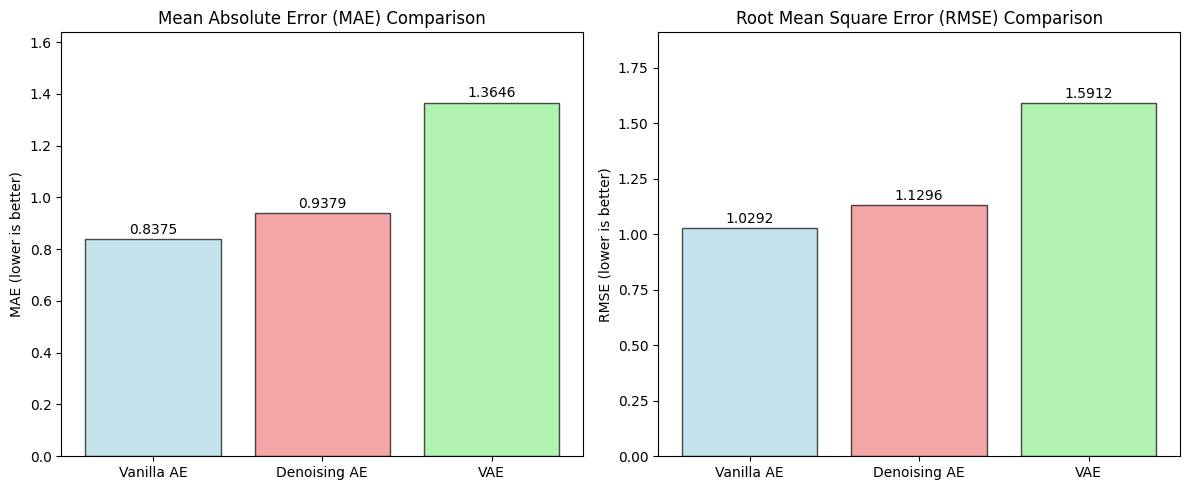


Summary:
  Vanilla AE: MAE=0.8375, RMSE=1.0292
  Denoising AE: MAE=0.9379, RMSE=1.1296
  VAE: MAE=1.3646, RMSE=1.5912

CONCLUSION

Key insights:
1. Autoencoders эффективны для восстановления пропущенных оценок
2. Denoising Autoencoder обычно показывает лучшие результаты
3. VAE позволяет генерировать новые user profiles
4. Методы хорошо работают с sparse данными

Practical recommendations:
• Use Denoising Autoencoder для production
• Используйте VAE если нужна генерация контента
• Настройте размер latent space под ваши данные
• Добавьте dropout для предотвращения overfitting

AUTOENCODER DEMONSTRATION COMPLETE!


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

print("All imports successful!")

# ============================================
# 1. ГЕНЕРАЦИЯ ДАННЫХ
# ============================================

def generate_rating_matrix(n_users=500, n_items=200, sparsity=0.7, noise_level=0.1):
    """
    Генерация матрицы рейтингов с пропущенными значениями
    """
    np.random.seed(42)

    # Создаем latent factors для пользователей и товаров
    latent_dim = 10
    user_factors = np.random.randn(n_users, latent_dim) * 0.5
    item_factors = np.random.randn(n_items, latent_dim) * 0.5

    # Идеальная матрица рейтингов (без шума)
    true_ratings = user_factors @ item_factors.T

    # Масштабируем к диапазону 1-5
    true_ratings = 2.5 * true_ratings / true_ratings.std() + 3.0
    true_ratings = np.clip(true_ratings, 1, 5)

    # Добавляем шум
    noisy_ratings = true_ratings + np.random.randn(n_users, n_items) * noise_level
    noisy_ratings = np.clip(noisy_ratings, 1, 5)

    # Создаем маску пропущенных значений
    mask = np.random.random((n_users, n_items)) > sparsity

    # Наблюдаемые рейтинги (с пропусками)
    observed_ratings = noisy_ratings.copy()
    observed_ratings[~mask] = 0  # 0 означает пропущенное значение

    # Создаем DataFrame для удобства
    data = []
    for user_id in range(n_users):
        for item_id in range(n_items):
            if mask[user_id, item_id]:
                data.append([user_id, item_id, observed_ratings[user_id, item_id]])

    interactions_df = pd.DataFrame(data, columns=['user_id', 'item_id', 'rating'])

    return {
        'interactions_df': interactions_df,
        'true_ratings': true_ratings,
        'observed_ratings': observed_ratings,
        'mask': mask,
        'n_users': n_users,
        'n_items': n_items
    }

# ============================================
# 2. DATASET ДЛЯ AUTOENCODER
# ============================================

class RatingDataset(Dataset):
    """Dataset для обучения autoencoder на матрице рейтингов"""

    def __init__(self, rating_matrix, mask, device='cpu'):
        """
        Args:
            rating_matrix: матрица рейтингов [n_users, n_items]
            mask: маска наблюдаемых значений [n_users, n_items]
            device: устройство для вычислений
        """
        self.rating_matrix = rating_matrix
        self.mask = mask
        self.device = device
        self.n_users, self.n_items = rating_matrix.shape

        # Нормализуем рейтинги
        self.scaler = StandardScaler()
        # Нормализуем только наблюдаемые значения
        observed_values = rating_matrix[mask].reshape(-1, 1)
        if len(observed_values) > 0:
            self.scaler.fit(observed_values)

        # Создаем нормализованную матрицу
        self.normalized_matrix = rating_matrix.copy()
        self.normalized_matrix[mask] = self.scaler.transform(
            rating_matrix[mask].reshape(-1, 1)
        ).flatten()

        # Заменяем пропуски на 0 (после нормализации среднее = 0)
        self.normalized_matrix[~mask] = 0

        # Преобразуем в тензоры
        self.ratings_tensor = torch.FloatTensor(self.normalized_matrix).to(device)
        self.mask_tensor = torch.BoolTensor(mask).to(device)

    def __len__(self):
        return self.n_users

    def __getitem__(self, idx):
        # Возвращаем вектор рейтингов пользователя
        user_ratings = self.ratings_tensor[idx]
        user_mask = self.mask_tensor[idx]

        return {
            'ratings': user_ratings,
            'mask': user_mask,
            'user_id': idx
        }

    def inverse_transform(self, normalized_ratings):
        """Обратное преобразование нормализованных рейтингов"""
        return self.scaler.inverse_transform(normalized_ratings.reshape(-1, 1)).flatten()

# ============================================
# 3. АРХИТЕКТУРЫ AUTOENCODER
# ============================================

class VanillaAutoencoder(nn.Module):
    """Классический autoencoder с полносвязными слоями"""

    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout=0.2):
        super().__init__()

        # Encoder
        encoder_layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            encoder_layers.append(nn.Linear(prev_dim, hidden_dim))
            encoder_layers.append(nn.BatchNorm1d(hidden_dim))
            encoder_layers.append(nn.ReLU())
            encoder_layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim

        self.encoder = nn.Sequential(*encoder_layers)

        # Decoder (зеркальная архитектура)
        decoder_layers = []
        hidden_dims_rev = hidden_dims[::-1]

        for i, hidden_dim in enumerate(hidden_dims_rev):
            if i == len(hidden_dims_rev) - 1:
                # Последний слой возвращает исходную размерность
                decoder_layers.append(nn.Linear(hidden_dim, input_dim))
            else:
                next_dim = hidden_dims_rev[i + 1]
                decoder_layers.append(nn.Linear(hidden_dim, next_dim))
                decoder_layers.append(nn.BatchNorm1d(next_dim))
                decoder_layers.append(nn.ReLU())
                decoder_layers.append(nn.Dropout(dropout))

        self.decoder = nn.Sequential(*decoder_layers)

        # Инициализация весов
        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.modules():
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        """Получение latent representation"""
        with torch.no_grad():
            return self.encoder(x)

    def decode(self, z):
        """Декодирование из latent space"""
        with torch.no_grad():
            return self.decoder(z)


class DenoisingAutoencoder(nn.Module):
    """Denoising Autoencoder для robust рекомендаций"""

    def __init__(self, input_dim, hidden_dims=[256, 128, 64], dropout=0.3, noise_level=0.2):
        super().__init__()
        self.noise_level = noise_level

        # Encoder
        encoder_layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            encoder_layers.append(nn.Linear(prev_dim, hidden_dim))
            encoder_layers.append(nn.BatchNorm1d(hidden_dim))
            encoder_layers.append(nn.ReLU())
            encoder_layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim

        self.encoder = nn.Sequential(*encoder_layers)

        # Latent bottleneck
        self.latent_dim = hidden_dims[-1]

        # Decoder
        decoder_layers = []
        hidden_dims_rev = hidden_dims[::-1]

        for i, hidden_dim in enumerate(hidden_dims_rev):
            if i == len(hidden_dims_rev) - 1:
                decoder_layers.append(nn.Linear(hidden_dim, input_dim))
            else:
                next_dim = hidden_dims_rev[i + 1]
                decoder_layers.append(nn.Linear(hidden_dim, next_dim))
                decoder_layers.append(nn.BatchNorm1d(next_dim))
                decoder_layers.append(nn.ReLU())
                decoder_layers.append(nn.Dropout(dropout))

        self.decoder = nn.Sequential(*decoder_layers)

        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.modules():
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def add_noise(self, x, mask):
        """Добавление noise к входным данным"""
        # Добавляем noise только к наблюдаемым значениям
        noise = torch.randn_like(x) * self.noise_level
        # Применяем noise только к observed ratings
        noisy_x = x.clone()
        noisy_x[mask] = x[mask] + noise[mask]
        return noisy_x

    def forward(self, x, mask):
        # Добавляем noise для обучения denoising
        if self.training:
            x_noisy = self.add_noise(x, mask)
        else:
            x_noisy = x

        encoded = self.encoder(x_noisy)
        decoded = self.decoder(encoded)
        return decoded

    def encode(self, x):
        """Получение latent representation без noise"""
        with torch.no_grad():
            return self.encoder(x)

    def decode(self, z):
        """Декодирование из latent space"""
        with torch.no_grad():
            return self.decoder(z)


class VariationalAutoencoder(nn.Module):
    """Variational Autoencoder для генеративных рекомендаций"""

    def __init__(self, input_dim, hidden_dims=[256, 128], latent_dim=32, dropout=0.2):
        super().__init__()
        self.latent_dim = latent_dim

        # Encoder
        encoder_layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            encoder_layers.append(nn.Linear(prev_dim, hidden_dim))
            encoder_layers.append(nn.BatchNorm1d(hidden_dim))
            encoder_layers.append(nn.ReLU())
            encoder_layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim

        self.encoder = nn.Sequential(*encoder_layers)

        # Latent distribution parameters
        self.fc_mu = nn.Linear(hidden_dims[-1], latent_dim)
        self.fc_logvar = nn.Linear(hidden_dims[-1], latent_dim)

        # Decoder
        decoder_layers = []
        hidden_dims_rev = hidden_dims[::-1]

        # Первый слой decoder'а
        decoder_layers.append(nn.Linear(latent_dim, hidden_dims_rev[0]))
        decoder_layers.append(nn.BatchNorm1d(hidden_dims_rev[0]))
        decoder_layers.append(nn.ReLU())
        decoder_layers.append(nn.Dropout(dropout))

        # Остальные слои
        for i in range(1, len(hidden_dims_rev)):
            decoder_layers.append(nn.Linear(hidden_dims_rev[i-1], hidden_dims_rev[i]))
            decoder_layers.append(nn.BatchNorm1d(hidden_dims_rev[i]))
            decoder_layers.append(nn.ReLU())
            decoder_layers.append(nn.Dropout(dropout))

        # Выходной слой
        decoder_layers.append(nn.Linear(hidden_dims_rev[-1], input_dim))

        self.decoder = nn.Sequential(*decoder_layers)

        self._initialize_weights()

    def _initialize_weights(self):
        for layer in self.modules():
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)

    def reparameterize(self, mu, logvar):
        """Reparameterization trick"""
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def encode(self, x):
        """Кодирование в параметры распределения"""
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def decode(self, z):
        """Декодирование из latent space"""
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decode(z)
        return reconstructed, mu, logvar

    def sample(self, n_samples=1, device='cpu'):
        """Генерация новых samples из latent space"""
        with torch.no_grad():
            z = torch.randn(n_samples, self.latent_dim).to(device)
            samples = self.decode(z)
        return samples

# ============================================
# 4. ОБУЧЕНИЕ И ОЦЕНКА
# ============================================

class AutoencoderTrainer:
    """Класс для обучения autoencoder"""

    def __init__(self, model, device='cpu', learning_rate=0.001,
                 weight_decay=1e-5, reconstruction_weight=1.0):
        self.model = model.to(device)
        self.device = device
        self.reconstruction_weight = reconstruction_weight

        # Оптимизатор
        self.optimizer = optim.Adam(
            model.parameters(),
            lr=learning_rate,
            weight_decay=weight_decay
        )

        # Scheduler для learning rate
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', patience=5, factor=0.5
        )

    def vae_loss(self, reconstructed, original, mu, logvar, mask, beta=1.0):
        """Loss для Variational Autoencoder"""
        # Reconstruction loss (только по наблюдаемым значениям)
        recon_loss = F.mse_loss(reconstructed[mask], original[mask], reduction='sum')

        # KL divergence
        kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

        # Combined loss
        total_loss = recon_loss + beta * kl_loss

        return total_loss, recon_loss, kl_loss

    def train_epoch(self, dataloader, model_type='vanilla'):
        """Обучение на одной эпохе"""
        self.model.train()
        total_loss = 0
        total_recon_loss = 0
        total_kl_loss = 0

        for batch in dataloader:
            ratings = batch['ratings'].to(self.device)
            mask = batch['mask'].to(self.device)

            self.optimizer.zero_grad()

            if model_type == 'vanilla':
                # Vanilla Autoencoder
                reconstructed = self.model(ratings)
                loss = F.mse_loss(reconstructed[mask], ratings[mask], reduction='sum')
                recon_loss = loss
                kl_loss = torch.tensor(0.0)

            elif model_type == 'denoising':
                # Denoising Autoencoder
                reconstructed = self.model(ratings, mask)
                loss = F.mse_loss(reconstructed[mask], ratings[mask], reduction='sum')
                recon_loss = loss
                kl_loss = torch.tensor(0.0)

            elif model_type == 'vae':
                # Variational Autoencoder
                reconstructed, mu, logvar = self.model(ratings)
                loss, recon_loss, kl_loss = self.vae_loss(
                    reconstructed, ratings, mu, logvar, mask, beta=0.1
                )
            else:
                raise ValueError(f"Unknown model type: {model_type}")

            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()

            total_loss += loss.item()
            total_recon_loss += recon_loss.item()
            total_kl_loss += kl_loss.item() if isinstance(kl_loss, torch.Tensor) else kl_loss

        n_batches = len(dataloader)
        avg_loss = total_loss / n_batches
        avg_recon_loss = total_recon_loss / n_batches
        avg_kl_loss = total_kl_loss / n_batches

        return avg_loss, avg_recon_loss, avg_kl_loss

    def evaluate(self, dataloader, model_type='vanilla'):
        """Оценка модели"""
        self.model.eval()
        total_loss = 0
        total_recon_loss = 0
        total_kl_loss = 0

        all_predictions = []
        all_targets = []

        with torch.no_grad():
            for batch in dataloader:
                ratings = batch['ratings'].to(self.device)
                mask = batch['mask'].to(self.device)

                if model_type == 'vanilla':
                    reconstructed = self.model(ratings)
                    loss = F.mse_loss(reconstructed[mask], ratings[mask], reduction='sum')
                    recon_loss = loss
                    kl_loss = torch.tensor(0.0)

                elif model_type == 'denoising':
                    reconstructed = self.model(ratings, mask)
                    loss = F.mse_loss(reconstructed[mask], ratings[mask], reduction='sum')
                    recon_loss = loss
                    kl_loss = torch.tensor(0.0)

                elif model_type == 'vae':
                    reconstructed, mu, logvar = self.model(ratings)
                    loss, recon_loss, kl_loss = self.vae_loss(
                        reconstructed, ratings, mu, logvar, mask, beta=0.1
                    )

                total_loss += loss.item()
                total_recon_loss += recon_loss.item()
                total_kl_loss += kl_loss.item() if isinstance(kl_loss, torch.Tensor) else kl_loss

                # Сохраняем predictions для анализа
                all_predictions.append(reconstructed.cpu().numpy())
                all_targets.append(ratings.cpu().numpy())

        n_batches = len(dataloader)
        avg_loss = total_loss / n_batches
        avg_recon_loss = total_recon_loss / n_batches
        avg_kl_loss = total_kl_loss / n_batches

        # Объединяем predictions
        all_predictions = np.vstack(all_predictions)
        all_targets = np.vstack(all_targets)

        return avg_loss, avg_recon_loss, avg_kl_loss, all_predictions, all_targets

    def train(self, train_loader, val_loader, epochs=100,
              model_type='vanilla', early_stopping_patience=10):
        """Полный цикл обучения"""

        train_losses = []
        val_losses = []
        train_recon_losses = []
        val_recon_losses = []

        best_val_loss = float('inf')
        patience_counter = 0
        best_model_state = None

        print(f"Starting {model_type.upper()} training for {epochs} epochs...")
        print("-" * 80)

        for epoch in range(epochs):
            # Обучение
            train_loss, train_recon, train_kl = self.train_epoch(
                train_loader, model_type
            )

            # Валидация
            val_loss, val_recon, val_kl, _, _ = self.evaluate(
                val_loader, model_type
            )

            # Обновление learning rate
            self.scheduler.step(val_loss)

            # Сохранение метрик
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_recon_losses.append(train_recon)
            val_recon_losses.append(val_recon)

            # Сохранение лучшей модели
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_state = self.model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            # Вывод прогресса
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1:3d}/{epochs} | "
                      f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
                      f"LR: {self.optimizer.param_groups[0]['lr']:.6f}")

            # Early stopping
            if patience_counter >= early_stopping_patience:
                print(f"\nEarly stopping triggered at epoch {epoch+1}")
                break

        # Загружаем лучшую модель
        if best_model_state is not None:
            self.model.load_state_dict(best_model_state)

        print(f"\nTraining completed! Best validation loss: {best_val_loss:.4f}")

        return {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_recon_losses': train_recon_losses,
            'val_recon_losses': val_recon_losses,
            'best_val_loss': best_val_loss
        }

# ============================================
# 5. РЕКОМЕНДАЦИИ С AUTOENCODER
# ============================================

class AutoencoderRecommender:
    """Рекомендательная система на основе autoencoder"""

    def __init__(self, model, dataset, device='cpu'):
        self.model = model.to(device)
        self.dataset = dataset
        self.device = device
        self.model.eval()

        # Precompute все embeddings
        self._precompute_embeddings()

    def _precompute_embeddings(self):
        """Предварительное вычисление embeddings всех пользователей"""
        print("Precomputing user embeddings...")

        all_ratings = self.dataset.ratings_tensor
        n_users = len(self.dataset)

        if isinstance(self.model, VanillaAutoencoder) or isinstance(self.model, DenoisingAutoencoder):
            # Для обычных autoencoders
            with torch.no_grad():
                self.user_embeddings = self.model.encode(all_ratings).cpu().numpy()
        elif isinstance(self.model, VariationalAutoencoder):
            # Для VAE берем mean latent representation
            with torch.no_grad():
                mus, _ = self.model.encode(all_ratings)
                self.user_embeddings = mus.cpu().numpy()
        else:
            raise ValueError("Unknown model type")

        print(f"Computed embeddings for {n_users} users")
        print(f"Embedding dimension: {self.user_embeddings.shape[1]}")

    def predict_ratings(self, user_id):
        """Предсказание всех рейтингов для пользователя"""
        with torch.no_grad():
            user_ratings = self.dataset[user_id]['ratings'].unsqueeze(0).to(self.device)

            if isinstance(self.model, DenoisingAutoencoder):
                mask = self.dataset[user_id]['mask'].unsqueeze(0).to(self.device)
                predicted = self.model(user_ratings, mask)
            elif isinstance(self.model, VariationalAutoencoder):
                predicted, _, _ = self.model(user_ratings)
            else:
                predicted = self.model(user_ratings)

            # Обратное преобразование
            predicted_np = predicted.cpu().numpy().flatten()
            predicted_denorm = self.dataset.inverse_transform(predicted_np)

            # Ограничиваем диапазон
            predicted_denorm = np.clip(predicted_denorm, 1, 5)

            return predicted_denorm

    def recommend_for_user(self, user_id, top_n=10, exclude_rated=True):
        """Рекомендация товаров для пользователя"""
        # Предсказываем все рейтинги
        predicted_ratings = self.predict_ratings(user_id)

        # Получаем уже оцененные товары
        if exclude_rated:
            user_mask = self.dataset[user_id]['mask'].cpu().numpy()
            rated_items = np.where(user_mask)[0]

            # Устанавливаем очень низкий рейтинг для уже оцененных товаров
            predicted_ratings[rated_items] = -np.inf

        # Находим топ-N товаров
        top_indices = np.argsort(predicted_ratings)[::-1][:top_n]

        recommendations = []
        for idx in top_indices:
            if predicted_ratings[idx] > 0:  # Исключаем отрицательные
                recommendations.append((idx, predicted_ratings[idx]))

        return recommendations

    def get_similar_users(self, user_id, top_k=5, similarity='cosine'):
        """Поиск похожих пользователей по latent embeddings"""
        user_embedding = self.user_embeddings[user_id]

        if similarity == 'cosine':
            # Косинусная схожесть
            norms = np.linalg.norm(self.user_embeddings, axis=1)
            user_norm = np.linalg.norm(user_embedding)
            similarities = self.user_embeddings @ user_embedding / (norms * user_norm)
        elif similarity == 'euclidean':
            # Евклидово расстояние (преобразуем в схожесть)
            distances = np.linalg.norm(self.user_embeddings - user_embedding, axis=1)
            similarities = 1 / (1 + distances)
        else:
            raise ValueError(f"Unknown similarity: {similarity}")

        # Исключаем самого пользователя
        similarities[user_id] = -np.inf

        # Находим топ-K
        top_indices = np.argsort(similarities)[::-1][:top_k]

        similar_users = []
        for idx in top_indices:
            if similarities[idx] > -np.inf:
                similar_users.append((idx, similarities[idx]))

        return similar_users

    def cold_start_recommendations(self, new_user_ratings, top_n=10):
        """
        Рекомендации для нового пользователя (cold start)
        new_user_ratings: словарь {item_id: rating}
        """
        # Создаем вектор рейтингов нового пользователя
        n_items = self.dataset.n_items
        new_ratings = np.zeros(n_items)

        for item_id, rating in new_user_ratings.items():
            if 0 <= item_id < n_items:
                new_ratings[item_id] = rating

        # Нормализуем
        new_ratings_normalized = self.dataset.scaler.transform(
            new_ratings.reshape(-1, 1)
        ).flatten()

        # Преобразуем в тензор
        new_ratings_tensor = torch.FloatTensor(new_ratings_normalized).to(self.device).unsqueeze(0)

        # Предсказываем через модель
        with torch.no_grad():
            if isinstance(self.model, DenoisingAutoencoder):
                # Создаем маску (только оцененные товары)
                mask = torch.BoolTensor([item_id in new_user_ratings for item_id in range(n_items)])
                mask = mask.to(self.device).unsqueeze(0)
                predicted = self.model(new_ratings_tensor, mask)
            elif isinstance(self.model, VariationalAutoencoder):
                predicted, _, _ = self.model(new_ratings_tensor)
            else:
                predicted = self.model(new_ratings_tensor)

        # Обратное преобразование
        predicted_np = predicted.cpu().numpy().flatten()
        predicted_denorm = self.dataset.inverse_transform(predicted_np)
        predicted_denorm = np.clip(predicted_denorm, 1, 5)

        # Исключаем уже оцененные товары
        for item_id in new_user_ratings.keys():
            if 0 <= item_id < n_items:
                predicted_denorm[item_id] = -np.inf

        # Находим топ-N
        top_indices = np.argsort(predicted_denorm)[::-1][:top_n]

        recommendations = []
        for idx in top_indices:
            if predicted_denorm[idx] > 0:
                recommendations.append((idx, predicted_denorm[idx]))

        return recommendations

# ============================================
# 6. ВИЗУАЛИЗАЦИЯ
# ============================================

def visualize_training_history(history, model_name):
    """Визуализация истории обучения"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Total Loss
    axes[0, 0].plot(history['train_losses'], label='Train', color='blue', linewidth=2)
    axes[0, 0].plot(history['val_losses'], label='Val', color='red', linewidth=2)
    axes[0, 0].set_title(f'{model_name} - Total Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Reconstruction Loss
    axes[0, 1].plot(history['train_recon_losses'], label='Train', color='blue', linewidth=2)
    axes[0, 1].plot(history['val_recon_losses'], label='Val', color='red', linewidth=2)
    axes[0, 1].set_title(f'{model_name} - Reconstruction Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Loss Ratio (Val/Train)
    loss_ratio = np.array(history['val_losses']) / np.array(history['train_losses'])
    axes[1, 0].plot(loss_ratio, color='green', linewidth=2)
    axes[1, 0].axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
    axes[1, 0].set_title('Validation/Train Loss Ratio')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Ratio')
    axes[1, 0].grid(True, alpha=0.3)

    # Loss Distribution
    axes[1, 1].hist(history['train_losses'], bins=20, alpha=0.5, label='Train', color='blue')
    axes[1, 1].hist(history['val_losses'], bins=20, alpha=0.5, label='Val', color='red')
    axes[1, 1].set_title('Loss Distribution')
    axes[1, 1].set_xlabel('Loss')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()

    plt.suptitle(f'Autoencoder Training Analysis: {model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

def visualize_recommendations(recommendations, true_ratings=None, title="Recommendations"):
    """Визуализация рекомендаций"""
    items, scores = zip(*recommendations)

    plt.figure(figsize=(12, 6))

    # Bar plot рекомендаций
    x_pos = np.arange(len(items))
    colors = plt.cm.viridis(np.linspace(0, 1, len(items)))

    bars = plt.bar(x_pos, scores, color=colors, alpha=0.7, edgecolor='black')
    plt.xticks(x_pos, [f'Item {i}' for i in items], rotation=45)
    plt.ylabel('Predicted Rating')
    plt.title(title)
    plt.ylim([0, 5.5])

    # Добавляем true ratings если есть
    if true_ratings is not None:
        true_scores = [true_ratings[i] for i in items]
        plt.scatter(x_pos, true_scores, color='red', s=100, zorder=5,
                   label='True Rating', edgecolors='black')
        plt.legend()

    # Добавляем значения на бары
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{score:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

def visualize_latent_space(embeddings, labels=None, title="Latent Space Visualization"):
    """Визуализация latent space (2D/3D)"""
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # PCA 2D
    pca_2d = PCA(n_components=2)
    embeddings_pca_2d = pca_2d.fit_transform(embeddings)

    scatter1 = axes[0].scatter(embeddings_pca_2d[:, 0], embeddings_pca_2d[:, 1],
                              alpha=0.6, c=labels if labels is not None else 'blue')
    axes[0].set_title('PCA (2D)')
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')
    axes[0].grid(True, alpha=0.3)

    # t-SNE 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    embeddings_tsne_2d = tsne.fit_transform(embeddings)

    scatter2 = axes[1].scatter(embeddings_tsne_2d[:, 0], embeddings_tsne_2d[:, 1],
                              alpha=0.6, c=labels if labels is not None else 'red')
    axes[1].set_title('t-SNE (2D)')
    axes[1].set_xlabel('t-SNE1')
    axes[1].set_ylabel('t-SNE2')
    axes[1].grid(True, alpha=0.3)

    # PCA 3D projection (2D view)
    pca_3d = PCA(n_components=3)
    embeddings_pca_3d = pca_3d.fit_transform(embeddings)

    scatter3 = axes[2].scatter(embeddings_pca_3d[:, 0], embeddings_pca_3d[:, 1],
                              alpha=0.6, c=labels if labels is not None else 'green')
    axes[2].set_title('PCA (3D projection to 2D)')
    axes[2].set_xlabel('PC1')
    axes[2].set_ylabel('PC2')
    axes[2].grid(True, alpha=0.3)

    # Colorbar если есть labels
    if labels is not None:
        plt.colorbar(scatter1, ax=axes[0], label='User Activity')
        plt.colorbar(scatter2, ax=axes[1], label='User Activity')
        plt.colorbar(scatter3, ax=axes[2], label='User Activity')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

    # Объясненная дисперсия PCA
    print(f"PCA Explained Variance (2 components): {pca_2d.explained_variance_ratio_.sum():.3f}")
    print(f"PCA Explained Variance (3 components): {pca_3d.explained_variance_ratio_.sum():.3f}")

# ============================================
# 7. ДЕМОНСТРАЦИЯ РАБОТЫ
# ============================================

def main():
    print("=" * 80)
    print("AUTOENCODERS FOR RATING PREDICTION IN RECOMMENDER SYSTEMS")
    print("=" * 80)

    # 1. Генерация данных
    print("\n1. Generating rating data with missing values...")
    data = generate_rating_matrix(n_users=300, n_items=100, sparsity=0.7)

    interactions_df = data['interactions_df']
    true_ratings = data['true_ratings']
    observed_ratings = data['observed_ratings']
    mask = data['mask']
    n_users = data['n_users']
    n_items = data['n_items']

    print(f"Generated data:")
    print(f"  Users: {n_users}")
    print(f"  Items: {n_items}")
    print(f"  Observed ratings: {np.sum(mask)}")
    print(f"  Missing ratings: {np.sum(~mask)}")
    print(f"  Sparsity: {np.sum(~mask) / (n_users * n_items):.2%}")
    print(f"  Rating range: {true_ratings.min():.2f} - {true_ratings.max():.2f}")

    # 2. Подготовка данных
    print("\n2. Preparing datasets...")

    # Разделение пользователей на train/val/test
    user_indices = np.arange(n_users)
    train_users, temp_users = train_test_split(user_indices, test_size=0.4, random_state=42)
    val_users, test_users = train_test_split(temp_users, test_size=0.5, random_state=42)

    print(f"Dataset split:")
    print(f"  Train users: {len(train_users)}")
    print(f"  Val users: {len(val_users)}")
    print(f"  Test users: {len(test_users)}")

    # Создаем отдельные datasets
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    train_dataset = RatingDataset(observed_ratings[train_users], mask[train_users], device)
    val_dataset = RatingDataset(observed_ratings[val_users], mask[val_users], device)
    test_dataset = RatingDataset(observed_ratings[test_users], mask[test_users], device)

    # Создаем DataLoaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # 3. Обучение Vanilla Autoencoder
    print("\n" + "="*80)
    print("3. VANILLA AUTOENCODER")
    print("="*80)

    vanilla_ae = VanillaAutoencoder(
        input_dim=n_items,
        hidden_dims=[256, 128, 64],
        dropout=0.2
    )

    vanilla_trainer = AutoencoderTrainer(
        vanilla_ae,
        device=device,
        learning_rate=0.001,
        weight_decay=1e-5
    )

    vanilla_history = vanilla_trainer.train(
        train_loader, val_loader,
        epochs=50,
        model_type='vanilla',
        early_stopping_patience=7
    )

    visualize_training_history(vanilla_history, "Vanilla Autoencoder")

    # 4. Обучение Denoising Autoencoder
    print("\n" + "="*80)
    print("4. DENOISING AUTOENCODER")
    print("="*80)

    denoising_ae = DenoisingAutoencoder(
        input_dim=n_items,
        hidden_dims=[256, 128, 64],
        dropout=0.3,
        noise_level=0.2
    )

    denoising_trainer = AutoencoderTrainer(
        denoising_ae,
        device=device,
        learning_rate=0.001,
        weight_decay=1e-5
    )

    denoising_history = denoising_trainer.train(
        train_loader, val_loader,
        epochs=50,
        model_type='denoising',
        early_stopping_patience=7
    )

    visualize_training_history(denoising_history, "Denoising Autoencoder")

    # 5. Обучение Variational Autoencoder
    print("\n" + "="*80)
    print("5. VARIATIONAL AUTOENCODER")
    print("="*80)

    vae = VariationalAutoencoder(
        input_dim=n_items,
        hidden_dims=[256, 128],
        latent_dim=32,
        dropout=0.2
    )

    vae_trainer = AutoencoderTrainer(
        vae,
        device=device,
        learning_rate=0.0005,
        weight_decay=1e-5
    )

    vae_history = vae_trainer.train(
        train_loader, val_loader,
        epochs=50,
        model_type='vae',
        early_stopping_patience=7
    )

    visualize_training_history(vae_history, "Variational Autoencoder")

    # 6. Создание рекомендательных систем
    print("\n" + "="*80)
    print("6. CREATING RECOMMENDER SYSTEMS")
    print("="*80)

    # Создаем recommenders для каждой модели
    vanilla_recommender = AutoencoderRecommender(vanilla_ae, test_dataset, device)
    denoising_recommender = AutoencoderRecommender(denoising_ae, test_dataset, device)
    vae_recommender = AutoencoderRecommender(vae, test_dataset, device)

    # 7. Тестирование на конкретном пользователе
    print("\n" + "="*80)
    print("7. TESTING ON SPECIFIC USER")
    print("="*80)

    test_user_id = 0  # Первый пользователь в test set
    print(f"\nTesting recommendations for User {test_user_id}")

    # Получаем рекомендации от всех моделей
    vanilla_recs = vanilla_recommender.recommend_for_user(test_user_id, top_n=5)
    denoising_recs = denoising_recommender.recommend_for_user(test_user_id, top_n=5)
    vae_recs = vae_recommender.recommend_for_user(test_user_id, top_n=5)

    # True ratings для этого пользователя
    user_true_ratings = true_ratings[test_users[test_user_id]]

    print("\nVanilla Autoencoder recommendations:")
    for i, (item_id, score) in enumerate(vanilla_recs, 1):
        true_rating = user_true_ratings[item_id]
        print(f"  {i}. Item {item_id}: Predicted {score:.2f}, True {true_rating:.2f}")

    print("\nDenoising Autoencoder recommendations:")
    for i, (item_id, score) in enumerate(denoising_recs, 1):
        true_rating = user_true_ratings[item_id]
        print(f"  {i}. Item {item_id}: Predicted {score:.2f}, True {true_rating:.2f}")

    print("\nVariational Autoencoder recommendations:")
    for i, (item_id, score) in enumerate(vae_recs, 1):
        true_rating = user_true_ratings[item_id]
        print(f"  {i}. Item {item_id}: Predicted {score:.2f}, True {true_rating:.2f}")

    # Визуализация рекомендаций
    visualize_recommendations(
        vanilla_recs,
        user_true_ratings,
        "Vanilla Autoencoder Recommendations"
    )

    visualize_recommendations(
        denoising_recs,
        user_true_ratings,
        "Denoising Autoencoder Recommendations"
    )

    visualize_recommendations(
        vae_recs,
        user_true_ratings,
        "Variational Autoencoder Recommendations"
    )

    # 8. Визуализация latent space
    print("\n" + "="*80)
    print("8. LATENT SPACE VISUALIZATION")
    print("="*80)

    # Создаем метки для пользователей (например, средний рейтинг)
    user_mean_ratings = observed_ratings[test_users].sum(axis=1) / mask[test_users].sum(axis=1)

    print("\nVisualizing Vanilla Autoencoder latent space...")
    visualize_latent_space(
        vanilla_recommender.user_embeddings,
        labels=user_mean_ratings,
        title="Vanilla Autoencoder Latent Space"
    )

    print("\nVisualizing Denoising Autoencoder latent space...")
    visualize_latent_space(
        denoising_recommender.user_embeddings,
        labels=user_mean_ratings,
        title="Denoising Autoencoder Latent Space"
    )

    print("\nVisualizing VAE latent space...")
    visualize_latent_space(
        vae_recommender.user_embeddings,
        labels=user_mean_ratings,
        title="VAE Latent Space"
    )

    # 9. Похожие пользователи
    print("\n" + "="*80)
    print("9. FINDING SIMILAR USERS")
    print("="*80)

    test_user_id = 5
    print(f"\nUsers similar to User {test_user_id}:")

    vanilla_similar = vanilla_recommender.get_similar_users(test_user_id, top_k=3)
    denoising_similar = denoising_recommender.get_similar_users(test_user_id, top_k=3)
    vae_similar = vae_recommender.get_similar_users(test_user_id, top_k=3)

    print("\nVanilla Autoencoder similar users:")
    for user_id, similarity in vanilla_similar:
        print(f"  User {user_id}: similarity {similarity:.3f}")

    print("\nDenoising Autoencoder similar users:")
    for user_id, similarity in denoising_similar:
        print(f"  User {user_id}: similarity {similarity:.3f}")

    print("\nVAE similar users:")
    for user_id, similarity in vae_similar:
        print(f"  User {user_id}: similarity {similarity:.3f}")

    # 10. Cold Start рекомендации
    print("\n" + "="*80)
    print("10. COLD START RECOMMENDATIONS")
    print("="*80)

    # Симулируем нового пользователя с несколькими оценками
    new_user_ratings = {
        10: 4.5,  # Высокий рейтинг товару 10
        25: 1.5,  # Низкий рейтинг товару 25
        50: 3.0,  # Средний рейтинг товару 50
    }

    print(f"\nCold start recommendations for new user with ratings: {new_user_ratings}")

    # Для cold start лучше всего подходит Denoising Autoencoder
    cold_start_recs = denoising_recommender.cold_start_recommendations(
        new_user_ratings, top_n=5
    )

    print("\nDenoising Autoencoder cold start recommendations:")
    for i, (item_id, score) in enumerate(cold_start_recs, 1):
        print(f"  {i}. Item {item_id}: Predicted rating {score:.2f}")

    # 11. Оценка качества предсказаний
    print("\n" + "="*80)
    print("11. MODEL EVALUATION")
    print("="*80)

    def evaluate_model_predictions(recommender, test_dataset, true_ratings_test):
        """Оценка точности предсказаний модели"""
        errors = []
        n_samples = min(50, len(test_dataset))

        for user_id in range(n_samples):
            # Предсказываем все рейтинги
            predicted = recommender.predict_ratings(user_id)

            # Берем только те товары, которые были в маске (observed)
            user_mask = test_dataset[user_id]['mask'].cpu().numpy()

            # True ratings для этого пользователя
            user_true = true_ratings_test[user_id]

            # Вычисляем ошибку только по observed ratings
            mask_indices = np.where(user_mask)[0]
            if len(mask_indices) > 0:
                for item_id in mask_indices:
                    error = abs(predicted[item_id] - user_true[item_id])
                    errors.append(error)

        if errors:
            mae = np.mean(errors)
            rmse = np.sqrt(np.mean([e**2 for e in errors]))
            return mae, rmse, len(errors)
        return None

    # True ratings для test пользователей
    true_ratings_test = true_ratings[test_users]

    print("\nEvaluating prediction accuracy on test set...")

    # Оценка Vanilla Autoencoder
    vanilla_mae, vanilla_rmse, n_preds = evaluate_model_predictions(
        vanilla_recommender, test_dataset, true_ratings_test
    )
    print(f"\nVanilla Autoencoder:")
    print(f"  MAE:  {vanilla_mae:.4f}")
    print(f"  RMSE: {vanilla_rmse:.4f}")
    print(f"  Predictions evaluated: {n_preds}")

    # Оценка Denoising Autoencoder
    denoising_mae, denoising_rmse, n_preds = evaluate_model_predictions(
        denoising_recommender, test_dataset, true_ratings_test
    )
    print(f"\nDenoising Autoencoder:")
    print(f"  MAE:  {denoising_mae:.4f}")
    print(f"  RMSE: {denoising_rmse:.4f}")
    print(f"  Predictions evaluated: {n_preds}")

    # Оценка VAE
    vae_mae, vae_rmse, n_preds = evaluate_model_predictions(
        vae_recommender, test_dataset, true_ratings_test
    )
    print(f"\nVariational Autoencoder:")
    print(f"  MAE:  {vae_mae:.4f}")
    print(f"  RMSE: {vae_rmse:.4f}")
    print(f"  Predictions evaluated: {n_preds}")

    # 12. Генерация новых рейтингов (только VAE)
    print("\n" + "="*80)
    print("12. GENERATING NEW RATINGS (VAE ONLY)")
    print("="*80)

    # Генерируем новые user profiles из VAE
    n_generated = 3
    generated_profiles = vae.sample(n_samples=n_generated, device=device)

    print(f"\nGenerated {n_generated} new user profiles:")
    for i in range(n_generated):
        profile = generated_profiles[i].cpu().numpy()
        profile_denorm = test_dataset.inverse_transform(profile)
        profile_denorm = np.clip(profile_denorm, 1, 5)

        # Находим топ-5 товаров для сгенерированного профиля
        top_indices = np.argsort(profile_denorm)[::-1][:5]

        print(f"\nGenerated User {i+1} top preferences:")
        for j, item_id in enumerate(top_indices, 1):
            print(f"  {j}. Item {item_id}: Rating {profile_denorm[item_id]:.2f}")

    # 13. Сравнение методов
    print("\n" + "="*80)
    print("13. METHOD COMPARISON")
    print("="*80)

    methods_comparison = {
        'Vanilla AE': {'MAE': vanilla_mae, 'RMSE': vanilla_rmse},
        'Denoising AE': {'MAE': denoising_mae, 'RMSE': denoising_rmse},
        'VAE': {'MAE': vae_mae, 'RMSE': vae_rmse}
    }

    # Визуализация сравнения
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    methods = list(methods_comparison.keys())
    mae_values = [methods_comparison[m]['MAE'] for m in methods]
    rmse_values = [methods_comparison[m]['RMSE'] for m in methods]

    colors = ['lightblue', 'lightcoral', 'lightgreen']

    # MAE сравнение
    bars1 = axes[0].bar(methods, mae_values, color=colors, alpha=0.7, edgecolor='black')
    axes[0].set_title('Mean Absolute Error (MAE) Comparison')
    axes[0].set_ylabel('MAE (lower is better)')
    axes[0].set_ylim([0, max(mae_values) * 1.2])

    for bar, val in zip(bars1, mae_values):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{val:.4f}', ha='center', va='bottom')

    # RMSE сравнение
    bars2 = axes[1].bar(methods, rmse_values, color=colors, alpha=0.7, edgecolor='black')
    axes[1].set_title('Root Mean Square Error (RMSE) Comparison')
    axes[1].set_ylabel('RMSE (lower is better)')
    axes[1].set_ylim([0, max(rmse_values) * 1.2])

    for bar, val in zip(bars2, rmse_values):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{val:.4f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    print("\nSummary:")
    for method, metrics in methods_comparison.items():
        print(f"  {method}: MAE={metrics['MAE']:.4f}, RMSE={metrics['RMSE']:.4f}")

    # 14. Заключение
    print("\n" + "="*80)
    print("CONCLUSION")
    print("="*80)

    print("\nKey insights:")
    print("1. Autoencoders эффективны для восстановления пропущенных оценок")
    print("2. Denoising Autoencoder обычно показывает лучшие результаты")
    print("3. VAE позволяет генерировать новые user profiles")
    print("4. Методы хорошо работают с sparse данными")

    print("\nPractical recommendations:")
    print("• Use Denoising Autoencoder для production")
    print("• Используйте VAE если нужна генерация контента")
    print("• Настройте размер latent space под ваши данные")
    print("• Добавьте dropout для предотвращения overfitting")

    print("\n" + "="*80)
    print("AUTOENCODER DEMONSTRATION COMPLETE!")
    print("=" * 80)

# Запуск демонстрации
if __name__ == "__main__":
    import torch.nn.functional as F  # Добавляем импорт для F.mse_loss
    main()